# Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Representación gráfica con Seaborn:
import seaborn as sns
sns.set(font_scale = 1)
# Generador de puntos
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

In [2]:
X, Y = make_blobs(n_samples=50, centers = 2, random_state=0, cluster_std=0.6 )
X[:10] # Coordenadas
Y[:10] # Categoría

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0])

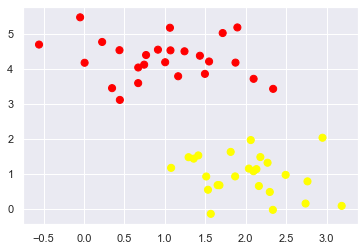

In [3]:
plt.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap = "autumn")
plt.show()

In [4]:
xx = np.linspace(np.min(X[:,0])*1.15, np.max(X[:,0])*1.15,num = 100)
xx[0],xx[-1]

(-0.638852382597045, 3.6629316306166246)

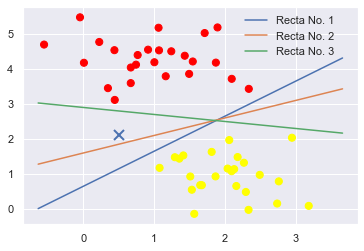

In [5]:
plt.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap = "autumn")
# Nueva coordenada
plt.plot([0.5],[2.1], "bx", markersize = 10, markeredgewidth = 2)
# ¿A qué grupor pertenece?

# Posibles lineas
for z,(a,b) in enumerate([(1,0.65),(0.5,1.6),(-0.2,2.9)]):
    yy = a*xx+b
    plt.plot(xx,yy, lw = 1.5, label = f"Recta No. {z+1}")
    plt.legend(loc=(.65,.75),frameon = False)
plt.show()

**<center> No es claro a que clasificación pertenece, por lo tanto, aplicaremos SVM para ver cual maximiza las bandas.**

## <font color = "red">  Maximización del Margen

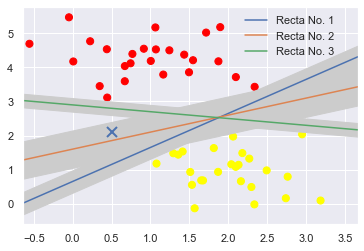

In [6]:
plt.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap = "autumn")
# Nueva coordenada
plt.plot([0.5],[2.1], "bx", markersize = 10, markeredgewidth = 2)
# ¿A qué grupor pertenece?

# Posibles lineas
for z,(a,b,d) in enumerate([(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]):
    yy = a*xx+b
    plt.plot(xx,yy, lw = 1.5, label = f"Recta No. {z+1}")
    plt.fill_between(xx,yy-d,yy+d, edgecolor = None, color = "#CCCCCC" if "#CCCCCC" else "lightgrey")

plt.xlim([min(xx),max(xx)])
plt.legend(loc = (0.65,0.75), frameon=False)
plt.show()
    

## Creación del Modelo SVM

In [7]:
from sklearn.svm import SVC

In [8]:
model = SVC(kernel = "linear", C = 1e6)
model.fit(X,Y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
?model.decision_function

In [10]:
nx , ny = (3,4);x = np.linspace(0,1,nx); y = np.linspace(0,1,ny)
nx, x,y

(3,
 array([0. , 0.5, 1. ]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]))

In [11]:
xx, yy= np.meshgrid(x,y)
print(xx)
print("--------------------------------------")
print(yy)

[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]]
--------------------------------------
[[0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333]
 [0.66666667 0.66666667 0.66666667]
 [1.         1.         1.        ]]


In [12]:
def plt_svc(model, ax = None, plot_support = True):
    """ Plot de la función de la decisión para una clasificación en 2D con SVC. """
    if ax is None:
        ax = plt.gca() # Adapatar los ejes de manera apropiada
        # Signature: plt.gca(**kwargs)
        # Get the current :class:`~matplotlib.axes.Axes` instance on the
        # current figure matching the given keyword args, or create one.
        ### Examples
        #To get the current polar axes on the current figure::
        #    plt.gca(projection='polar')
        #If the current axes doesn't exist, or isn't a polar one, the appropriate
        #axes will be created and then returned.
    xlim = ax.get_xlim() # Obtener límites de los ejes para hacer puntos  ---> (0.0, 1.0)
    ylim = ax.get_ylim() # Obtener límites de los ejes para hacer puntos  ---> (0.0, 1.0)
    xx = np.linspace(xlim[0], xlim[1],30)
    yy = np.linspace(ylim[0], ylim[1],30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
    P = model.decision_function(xy).reshape(X.shape)
    # Hacer un reshape para aplicar la función de decisión. Como arriba cuando hicimos el predict
    
    # Representamos las fronteras y márgenes del SVC
    ax.contour(X, Y, P, colors = "k", levels = [-1,0,1], alpha = 0.5, linestyles = ["--","-","--"])
    print("Vectores de Soporte")
    print(model.support_vectors_)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s = 300, lw = 1, facecolors = "black")
    # Definimos de nuevo los límites por si se cambiaron durante el proceso
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Vectores de Soporte
[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


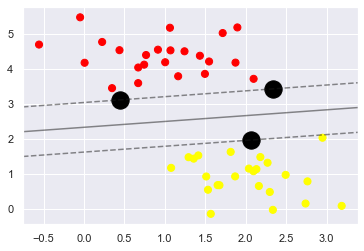

In [13]:
plt.scatter(X[:,0],X[:,1],c = Y, s = 50, cmap = "autumn")
plt_svc(model, plot_support=True)  # Función # plot_support=False no me debería de plotear los vectores soporte con negro

In [14]:
?plt.contour

In [15]:
# Tomar solo ciertos puntos del dataset
def plot_svm(N = 10, ax = None):
    X, Y = make_blobs(n_samples=200, centers= 2, random_state=0, cluster_std=0.6)
    
    # Elegir los datos para realizar el modelo
    X = X[:N]
    Y = Y[:N]
    
    model = SVC(kernel = "linear", C = 1e7)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    
    ax.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    # Tomar solo ciertos puntos del dataset
    
    plt_svc(model, ax)


Vectores de Soporte
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
Vectores de Soporte
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


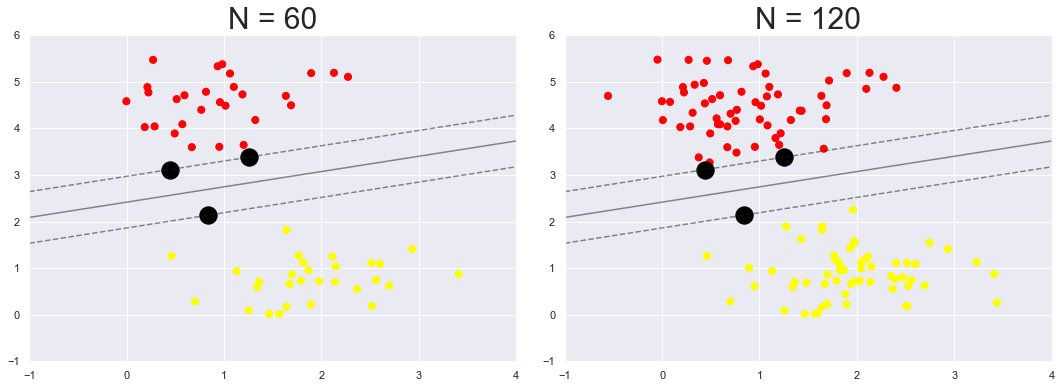

In [16]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
fig.subplots_adjust(left=0.0625,right=0.95, wspace=0.1)  # left=0.0625,right=0.95 espacio de los margenes
for ax_i, N, in zip(ax,[60,120]): # ax es tambien un arreglo de [dato1, dato2]
    plot_svm(N,ax_i)
    ax_i.set_title(f"N = {N}", size = 30)

In [17]:
from ipywidgets import interact, fixed

In [18]:
interact(plot_svm, N = [l for l in range(10,210,10)], ax = fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 13…

<function __main__.plot_svm(N=10, ax=None)>